# Did you like the movie? - Exploratory Data Analysis stage

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
movies = pd.read_csv('movie_DB_clean.csv',index_col='Title')
#this line of code loads the data from the movie_DB_clean.csv file into a pandas DataFrame named movies, with the movie titles serving as the row index.

## Exploring the dataset

In [3]:
movies.head()
#movies.head() is used to preview the first few rows of a DataFrame, which is a common practice when initially exploring a dataset.

Year   Genre  Duration      Budget   Revenue  Fan_1  \
Title                                                                           
The shawshank redemption  1994   Drama       142   28.341469  2.343110   90.0   
The godfather             1972   Crime       175  134.966411  1.620367   78.0   
The dark knight           2008  Action       152  534.858444  2.303232   97.0   
The godfather part ii     1974   Crime       202   57.300000  1.129952   72.0   
12 angry men              1957   Crime        96    4.360000  0.689845   90.0   

                          Fan_2  Fan_3  Fan_4  Fan_5  ...  Fan_16  Fan_17  \
Title                                                 ...                   
The shawshank redemption   75.0   86.0   61.0   74.0  ...    87.0    93.0   
The godfather              98.0   73.0   71.0   85.0  ...    85.0    60.0   
The dark knight            98.0   66.0   82.0   82.0  ...    69.0    76.0   
The godfather part ii      78.0   70.0   68.0   95.0  ...    63.0    87.0   
12 angry men               76.0   68.0   96.0   79.0  ...    71.0    89.0   

                          Fan_18  Fan_19  Fan_20  IMBD   Rotten_Tomatoes  \
Title                                                                      
The shawshank redemption    70.0    76.0    62.0     93               99   
The godfather               98.0    76.0    96.0     92               80   
The dark knight             97.0    64.0    74.0     90               95   
The godfather part ii       61.0    83.0    75.0     90               82   
12 angry men                89.0    90.0    67.0     90               81   

                          Metacritic  Letterboxd  Personal  
Title                                                       
The shawshank redemption        98.0          84      80.0  
The godfather                   97.0          91     100.0  
The dark knight                 74.0          70      84.0  
The godfather part ii           75.0          91      90.0  
12 angry men                    80.0          86      96.0  

[5 rows x 30 columns]

In [4]:
movies.tail()
#movies.tail() is used to preview the last few rows of a DataFrame, which is useful when initially exploring a dataset or checking for issues that might be more evident at the end of the data.

Year   Genre  Duration  Budget  Revenue  \
Title                                                                        
Et                                 1982  Family       115    10.5    792.9   
Blade runnner 2049                 2017  Action       164   150.0    260.5   
Avatar                             2009  Action       162   237.0   2924.0   
Scott pilgrim vs the world         2010  Action       112    85.0     48.1   
Everything everywhere all at once  2022  Action       140    25.0    143.0   

                                   Fan_1  Fan_2  Fan_3  Fan_4  Fan_5  ...  \
Title                                                                 ...   
Et                                  83.0   91.0    NaN    NaN    NaN  ...   
Blade runnner 2049                   NaN   94.0   99.0    NaN   66.0  ...   
Avatar                              84.0   97.0   80.0   67.0   67.0  ...   
Scott pilgrim vs the world           NaN   83.0   82.0   68.0    NaN  ...   
Everything everywhere all at once   88.0    NaN    NaN    NaN   70.0  ...   

                                   Fan_16  Fan_17  Fan_18  Fan_19  Fan_20  \
Title                                                                       
Et                                    NaN    90.0    69.0    83.0     NaN   
Blade runnner 2049                   80.0    68.0    80.0    86.0    93.0   
Avatar                                NaN    76.0    96.0     NaN    94.0   
Scott pilgrim vs the world            NaN    96.0     NaN     NaN    65.0   
Everything everywhere all at once    94.0    96.0    97.0    80.0    67.0   

                                   IMBD   Rotten_Tomatoes  Metacritic  \
Title                                                                   
Et                                    78               98        91.0   
Blade runnner 2049                    80               88        81.0   
Avatar                                78               82        83.0   
Scott pilgrim vs the world            75               82        69.0   
Everything everywhere all at once     78               94        81.0   

                                   Letterboxd  Personal  
Title                                                    
Et                                         80      75.0  
Blade runnner 2049                         80      90.0  
Avatar                                     78      70.0  
Scott pilgrim vs the world                 76      84.0  
Everything everywhere all at once          86      86.0  

[5 rows x 30 columns]

In [5]:
movies.shape
#movies.shape provides a quick and easy way to find out the number of rows and columns in the DataFrame, which is helpful for understanding the size and structure of your dataset.

(194, 30)

In [6]:
movies.info()
#movies.info() is a useful method for getting a quick overview of the structure, data types, and completeness of your DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, The shawshank redemption to Everything everywhere all at once
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             194 non-null    int64  
 1   Genre            194 non-null    object 
 2   Duration         194 non-null    int64  
 3   Budget           189 non-null    float64
 4   Revenue          192 non-null    float64
 5   Fan_1            149 non-null    float64
 6   Fan_2            153 non-null    float64
 7   Fan_3            148 non-null    float64
 8   Fan_4            143 non-null    float64
 9   Fan_5            150 non-null    float64
 10  Fan_6            143 non-null    float64
 11  Fan_7            156 non-null    float64
 12  Fan_8            154 non-null    float64
 13  Fan_9            157 non-null    float64
 14  Fan_10           153 non-null    float64
 15  Fan_11           159 non-null    float64
 16  Fan_12        

In [7]:
movies.iloc[:,5:25].describe()
#movies.iloc[:, 5:25].describe() selects a subset of columns from the movies DataFrame (specifically, the 6th to 25th columns) and then computes and displays descriptive statistics for those columns, giving insights into the distribution and summary statistics of the selected data.

Fan_1       Fan_2       Fan_3      Fan_4       Fan_5       Fan_6  \
count  149.000000  153.000000  148.000000  143.00000  150.000000  143.000000   
mean    74.644295   80.856209   80.351351   82.34965   80.086667   81.041958   
std     21.854579   11.602755   12.748677   11.33377   10.897901   11.321097   
min     10.000000   10.000000   10.000000   60.00000   60.000000   35.000000   
25%     69.000000   75.000000   70.000000   72.00000   72.000000   70.000000   
50%     80.000000   82.000000   81.500000   85.00000   80.000000   83.000000   
75%     89.000000   90.000000   90.000000   90.00000   90.000000   90.000000   
max    100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   

           Fan_7       Fan_8       Fan_9      Fan_10      Fan_11      Fan_12  \
count  156.00000  154.000000  157.000000  153.000000  159.000000  153.000000   
mean    81.50641   79.590909   79.280255   80.300654   80.364780   78.594771   
std     10.77901   12.916329   12.138007   12.558854   12.102109   12.174952   
min     46.00000   10.000000   45.000000   10.000000   10.000000   10.000000   
25%     71.75000   71.000000   70.000000   73.000000   72.000000   70.000000   
50%     81.50000   80.000000   80.000000   80.000000   80.000000   80.000000   
75%     90.00000   89.000000   89.000000   90.000000   90.000000   87.000000   
max    100.00000  100.000000  100.000000  100.000000  100.000000  100.000000   

           Fan_13      Fan_14      Fan_15      Fan_16      Fan_17      Fan_18  \
count  155.000000  156.000000  156.000000  141.000000  150.000000  147.000000   
mean    80.651613   73.698718   80.794872   81.673759   81.440000   78.863946   
std     11.033358   18.884170   10.513719    9.475153    9.424714   11.762862   
min     40.000000   12.000000   60.000000   60.000000   50.000000   44.000000   
25%     72.000000   68.750000   72.500000   75.000000   75.250000   70.000000   
50%     80.000000   76.000000   81.000000   82.000000   81.000000   80.000000   
75%     88.000000   87.000000   90.000000   90.000000   89.000000   89.000000   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

           Fan_19      Fan_20  
count  156.000000  158.000000  
mean    77.673077   78.582278  
std     13.538077   12.955197  
min     10.000000   41.000000  
25%     70.000000   70.000000  
50%     80.000000   80.000000  
75%     86.000000   88.750000  
max    100.000000  100.000000

In [8]:
movies.iloc[:,5:25].describe()

Fan_1       Fan_2       Fan_3      Fan_4       Fan_5       Fan_6  \
count  149.000000  153.000000  148.000000  143.00000  150.000000  143.000000   
mean    74.644295   80.856209   80.351351   82.34965   80.086667   81.041958   
std     21.854579   11.602755   12.748677   11.33377   10.897901   11.321097   
min     10.000000   10.000000   10.000000   60.00000   60.000000   35.000000   
25%     69.000000   75.000000   70.000000   72.00000   72.000000   70.000000   
50%     80.000000   82.000000   81.500000   85.00000   80.000000   83.000000   
75%     89.000000   90.000000   90.000000   90.00000   90.000000   90.000000   
max    100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   

           Fan_7       Fan_8       Fan_9      Fan_10      Fan_11      Fan_12  \
count  156.00000  154.000000  157.000000  153.000000  159.000000  153.000000   
mean    81.50641   79.590909   79.280255   80.300654   80.364780   78.594771   
std     10.77901   12.916329   12.138007   12.558854   12.102109   12.174952   
min     46.00000   10.000000   45.000000   10.000000   10.000000   10.000000   
25%     71.75000   71.000000   70.000000   73.000000   72.000000   70.000000   
50%     81.50000   80.000000   80.000000   80.000000   80.000000   80.000000   
75%     90.00000   89.000000   89.000000   90.000000   90.000000   87.000000   
max    100.00000  100.000000  100.000000  100.000000  100.000000  100.000000   

           Fan_13      Fan_14      Fan_15      Fan_16      Fan_17      Fan_18  \
count  155.000000  156.000000  156.000000  141.000000  150.000000  147.000000   
mean    80.651613   73.698718   80.794872   81.673759   81.440000   78.863946   
std     11.033358   18.884170   10.513719    9.475153    9.424714   11.762862   
min     40.000000   12.000000   60.000000   60.000000   50.000000   44.000000   
25%     72.000000   68.750000   72.500000   75.000000   75.250000   70.000000   
50%     80.000000   76.000000   81.000000   82.000000   81.000000   80.000000   
75%     88.000000   87.000000   90.000000   90.000000   89.000000   89.000000   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

           Fan_19      Fan_20  
count  156.000000  158.000000  
mean    77.673077   78.582278  
std     13.538077   12.955197  
min     10.000000   41.000000  
25%     70.000000   70.000000  
50%     80.000000   80.000000  
75%     86.000000   88.750000  
max    100.000000  100.000000

## Missing values

In [9]:
movies.isnull().sum()
#movies.isnull().sum() is used to quickly identify how many missing values are present in each column of the DataFrame, which is useful for data cleaning and preprocessing tasks.

Year                0
Genre               0
Duration            0
Budget              5
Revenue             2
Fan_1              45
Fan_2              41
Fan_3              46
Fan_4              51
Fan_5              44
Fan_6              51
Fan_7              38
Fan_8              40
Fan_9              37
Fan_10             41
Fan_11             35
Fan_12             41
Fan_13             39
Fan_14             38
Fan_15             38
Fan_16             53
Fan_17             44
Fan_18             47
Fan_19             38
Fan_20             36
IMBD                0
Rotten_Tomatoes     0
Metacritic          2
Letterboxd          0
Personal           41
dtype: int64

### Fan ratings

We will create a new column, `Fans`, with the average of fan ratings columns

In [10]:
movies.iloc[:,5:25]
#movies.iloc[:, 5:25] selects all rows but only the columns from the 6th to the 25th by their positional indices, creating a new DataFrame that includes this specific subset of columns.

Fan_1  Fan_2  Fan_3  Fan_4  Fan_5  Fan_6  \
Title                                                                         
The shawshank redemption            90.0   75.0   86.0   61.0   74.0   76.0   
The godfather                       78.0   98.0   73.0   71.0   85.0   97.0   
The dark knight                     97.0   98.0   66.0   82.0   82.0   72.0   
The godfather part ii               72.0   78.0   70.0   68.0   95.0   67.0   
12 angry men                        90.0   76.0   68.0   96.0   79.0   90.0   
...                                  ...    ...    ...    ...    ...    ...   
Et                                  83.0   91.0    NaN    NaN    NaN    NaN   
Blade runnner 2049                   NaN   94.0   99.0    NaN   66.0    NaN   
Avatar                              84.0   97.0   80.0   67.0   67.0   96.0   
Scott pilgrim vs the world           NaN   83.0   82.0   68.0    NaN    NaN   
Everything everywhere all at once   88.0    NaN    NaN    NaN   70.0   83.0   

                                   Fan_7  Fan_8  Fan_9  Fan_10  Fan_11  \
Title                                                                    
The shawshank redemption           100.0   73.0   91.0    91.0    94.0   
The godfather                       77.0   74.0   86.0    72.0    61.0   
The dark knight                     73.0   75.0   89.0    80.0    82.0   
The godfather part ii               81.0  100.0   78.0    63.0    78.0   
12 angry men                        63.0   83.0   64.0    69.0    82.0   
...                                  ...    ...    ...     ...     ...   
Et                                   NaN    NaN   72.0    96.0    89.0   
Blade runnner 2049                  89.0   94.0    NaN     NaN    91.0   
Avatar                              92.0   95.0   65.0    85.0    93.0   
Scott pilgrim vs the world          95.0    NaN    NaN     NaN    95.0   
Everything everywhere all at once   83.0   92.0   90.0    94.0    99.0   

                                   Fan_12  Fan_13  Fan_14  Fan_15  Fan_16  \
Title                                                                       
The shawshank redemption             60.0    86.0    99.0    96.0    87.0   
The godfather                        73.0    73.0    60.0    74.0    85.0   
The dark knight                      71.0    71.0    92.0    68.0    69.0   
The godfather part ii                86.0    71.0    83.0    73.0    63.0   
12 angry men                         63.0    70.0    86.0    60.0    71.0   
...                                   ...     ...     ...     ...     ...   
Et                                    NaN    61.0    91.0    89.0     NaN   
Blade runnner 2049                   62.0     NaN    94.0     NaN    80.0   
Avatar                               63.0    63.0    97.0    91.0     NaN   
Scott pilgrim vs the world           64.0     NaN     NaN     NaN     NaN   
Everything everywhere all at once    66.0    66.0     NaN     NaN    94.0   

                                   Fan_17  Fan_18  Fan_19  Fan_20  
Title                                                              
The shawshank redemption             93.0    70.0    76.0    62.0  
The godfather                        60.0    98.0    76.0    96.0  
The dark knight                      76.0    97.0    64.0    74.0  
The godfather part ii                87.0    61.0    83.0    75.0  
12 angry men                         89.0    89.0    90.0    67.0  
...                                   ...     ...     ...     ...  
Et                                   90.0    69.0    83.0     NaN  
Blade runnner 2049                   68.0    80.0    86.0    93.0  
Avatar                               76.0    96.0     NaN    94.0  
Scott pilgrim vs the world           96.0     NaN     NaN    65.0  
Everything everywhere all at once    96.0    97.0    80.0    67.0  

[194 rows x 20 columns]

In [11]:
movies.iloc[:,5:25].mean()
# movies.iloc[:, 5:25].mean() selects a specific subset of columns from the movies DataFrame and computes the mean of each of these columns, providing a quick summary of the average values for those columns. This operation is typically applied to numeric columns, as the mean calculation is not applicable to non-numeric data.

Fan_1     74.644295
Fan_2     80.856209
Fan_3     80.351351
Fan_4     82.349650
Fan_5     80.086667
Fan_6     81.041958
Fan_7     81.506410
Fan_8     79.590909
Fan_9     79.280255
Fan_10    80.300654
Fan_11    80.364780
Fan_12    78.594771
Fan_13    80.651613
Fan_14    73.698718
Fan_15    80.794872
Fan_16    81.673759
Fan_17    81.440000
Fan_18    78.863946
Fan_19    77.673077
Fan_20    78.582278
dtype: float64

In [12]:
movies.iloc[:,5:25].mean(axis=1)
#movies.iloc[:, 5:25].mean(axis=1) calculates the mean of the selected columns for each row in the DataFrame, resulting in a Series where each value represents the average of the specified columns for a single row (movie). This is useful for summarizing the data on a per-row basis.

Title
The shawshank redemption             82.000000
The godfather                        78.350000
The dark knight                      78.900000
The godfather part ii                76.600000
12 angry men                         77.250000
                                       ...    
Et                                   83.090909
Blade runnner 2049                   84.307692
Avatar                               83.388889
Scott pilgrim vs the world           81.000000
Everything everywhere all at once    84.333333
Length: 194, dtype: float64

In [13]:
movies['Fans']=movies.iloc[:,5:25].mean(axis=1)
movies.head()
#This syntax adds a new column named 'Fans' to the DataFrame movies.

Year   Genre  Duration      Budget   Revenue  Fan_1  \
Title                                                                           
The shawshank redemption  1994   Drama       142   28.341469  2.343110   90.0   
The godfather             1972   Crime       175  134.966411  1.620367   78.0   
The dark knight           2008  Action       152  534.858444  2.303232   97.0   
The godfather part ii     1974   Crime       202   57.300000  1.129952   72.0   
12 angry men              1957   Crime        96    4.360000  0.689845   90.0   

                          Fan_2  Fan_3  Fan_4  Fan_5  ...  Fan_17  Fan_18  \
Title                                                 ...                   
The shawshank redemption   75.0   86.0   61.0   74.0  ...    93.0    70.0   
The godfather              98.0   73.0   71.0   85.0  ...    60.0    98.0   
The dark knight            98.0   66.0   82.0   82.0  ...    76.0    97.0   
The godfather part ii      78.0   70.0   68.0   95.0  ...    87.0    61.0   
12 angry men               76.0   68.0   96.0   79.0  ...    89.0    89.0   

                          Fan_19  Fan_20  IMBD   Rotten_Tomatoes  Metacritic  \
Title                                                                          
The shawshank redemption    76.0    62.0     93               99        98.0   
The godfather               76.0    96.0     92               80        97.0   
The dark knight             64.0    74.0     90               95        74.0   
The godfather part ii       83.0    75.0     90               82        75.0   
12 angry men                90.0    67.0     90               81        80.0   

                          Letterboxd  Personal   Fans  
Title                                                  
The shawshank redemption          84      80.0  82.00  
The godfather                     91     100.0  78.35  
The dark knight                   70      84.0  78.90  
The godfather part ii             91      90.0  76.60  
12 angry men                      86      96.0  77.25  

[5 rows x 31 columns]

In [14]:
dropped_columns=movies.iloc[:,5:25].columns
dropped_columns
#This attribute retrieves the column labels (names) of the selected subset of columns.
#dropped_columns: This variable is assigned the column names obtained from the subset of columns.

Index(['Fan_1', 'Fan_2', 'Fan_3', 'Fan_4', 'Fan_5', 'Fan_6', 'Fan_7', 'Fan_8',
       'Fan_9', 'Fan_10', 'Fan_11', 'Fan_12', 'Fan_13', 'Fan_14', 'Fan_15',
       'Fan_16', 'Fan_17', 'Fan_18', 'Fan_19', 'Fan_20'],
      dtype='object')

In [15]:
movies.drop(columns=dropped_columns,inplace=True)
movies.head()
#After executing this code, the columns specified in dropped_columns will be removed from the movies DataFrame.

Year   Genre  Duration      Budget   Revenue IMBD   \
Title                                                                          
The shawshank redemption  1994   Drama       142   28.341469  2.343110    93   
The godfather             1972   Crime       175  134.966411  1.620367    92   
The dark knight           2008  Action       152  534.858444  2.303232    90   
The godfather part ii     1974   Crime       202   57.300000  1.129952    90   
12 angry men              1957   Crime        96    4.360000  0.689845    90   

                          Rotten_Tomatoes  Metacritic Letterboxd  Personal  \
Title                                                                        
The shawshank redemption               99        98.0         84      80.0   
The godfather                          80        97.0         91     100.0   
The dark knight                        95        74.0         70      84.0   
The godfather part ii                  82        75.0         91      90.0   
12 angry men                           81        80.0         86      96.0   

                           Fans  
Title                            
The shawshank redemption  82.00  
The godfather             78.35  
The dark knight           78.90  
The godfather part ii     76.60  
12 angry men              77.25

In [16]:
movies.describe()

Year    Duration      Budget      Revenue  Rotten_Tomatoes  \
count   194.000000  194.000000  189.000000   192.000000       194.000000   
mean   1995.386598  130.701031   94.514567   288.952807        86.185567   
std      22.215152   29.085069  102.808221   461.818222        11.974351   
min    1902.000000   14.000000    0.200000     0.041960        18.000000   
25%    1982.250000  115.000000   13.092000     1.656800        80.000000   
50%    2000.500000  129.000000   55.000000    90.891504        90.000000   
75%    2012.000000  147.750000  150.000000   413.593973        95.000000   
max    2023.000000  218.000000  534.858444  2924.000000       100.000000   

       Metacritic    Personal        Fans  
count  192.000000  153.000000  194.000000  
mean    78.609375   82.666667   80.212292  
std     12.363115   10.015120    6.550271  
min     32.000000   57.000000   58.466667  
25%     71.000000   75.000000   77.194853  
50%     78.000000   85.000000   80.297059  
75%     88.250000   90.000000   84.243697  
max    100.000000  100.000000   96.000000

### Dropping records with null values

In [17]:
movies.isnull().sum()

Year                0
Genre               0
Duration            0
Budget              5
Revenue             2
IMBD                0
Rotten_Tomatoes     0
Metacritic          2
Letterboxd          0
Personal           41
Fans                0
dtype: int64

In [18]:
movies.dropna(inplace=True)
#After executing this code, rows containing missing values will be removed from the movies DataFrame, and the DataFrame will be updated accordingly.

In [19]:
movies.shape

(148, 11)

In [20]:
movies.isnull().sum()

Year               0
Genre              0
Duration           0
Budget             0
Revenue            0
IMBD               0
Rotten_Tomatoes    0
Metacritic         0
Letterboxd         0
Personal           0
Fans               0
dtype: int64

## Descriptive Statistics - Numeric data

### Summary

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, The shawshank redemption to Everything everywhere all at once
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             148 non-null    int64  
 1   Genre            148 non-null    object 
 2   Duration         148 non-null    int64  
 3   Budget           148 non-null    float64
 4   Revenue          148 non-null    float64
 5   IMBD             148 non-null    object 
 6   Rotten_Tomatoes  148 non-null    int64  
 7   Metacritic       148 non-null    float64
 8   Letterboxd       148 non-null    object 
 9   Personal         148 non-null    float64
 10  Fans             148 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 13.9+ KB


In [22]:
movies.describe()

Year    Duration      Budget      Revenue  Rotten_Tomatoes  \
count   148.000000  148.000000  148.000000   148.000000       148.000000   
mean   1999.263514  133.324324  112.370922   327.172457        85.182432   
std      17.922115   27.153185  107.523004   500.635714        12.560622   
min    1940.000000   75.000000    0.269061     0.042004        18.000000   
25%    1988.750000  115.000000   19.875310     1.505659        79.750000   
50%    2002.000000  130.000000   91.000000   106.242761        89.000000   
75%    2014.000000  150.250000  175.000000   491.744868        94.000000   
max    2023.000000  207.000000  534.858444  2924.000000       100.000000   

       Metacritic    Personal        Fans  
count  148.000000  148.000000  148.000000  
mean    78.155405   82.520270   80.718124  
std     12.339700   10.105881    6.250194  
min     32.000000   57.000000   58.466667  
25%     70.750000   75.000000   78.050000  
50%     78.000000   84.500000   80.783333  
75%     88.000000   90.000000   84.159664  
max     99.000000  100.000000   96.000000

In [23]:
movies['Year']=movies['Year'].astype(str)

movies.describe()

Duration      Budget      Revenue  Rotten_Tomatoes  Metacritic  \
count  148.000000  148.000000   148.000000       148.000000  148.000000   
mean   133.324324  112.370922   327.172457        85.182432   78.155405   
std     27.153185  107.523004   500.635714        12.560622   12.339700   
min     75.000000    0.269061     0.042004        18.000000   32.000000   
25%    115.000000   19.875310     1.505659        79.750000   70.750000   
50%    130.000000   91.000000   106.242761        89.000000   78.000000   
75%    150.250000  175.000000   491.744868        94.000000   88.000000   
max    207.000000  534.858444  2924.000000       100.000000   99.000000   

         Personal        Fans  
count  148.000000  148.000000  
mean    82.520270   80.718124  
std     10.105881    6.250194  
min     57.000000   58.466667  
25%     75.000000   78.050000  
50%     84.500000   80.783333  
75%     90.000000   84.159664  
max    100.000000   96.000000

### Detecting outliers

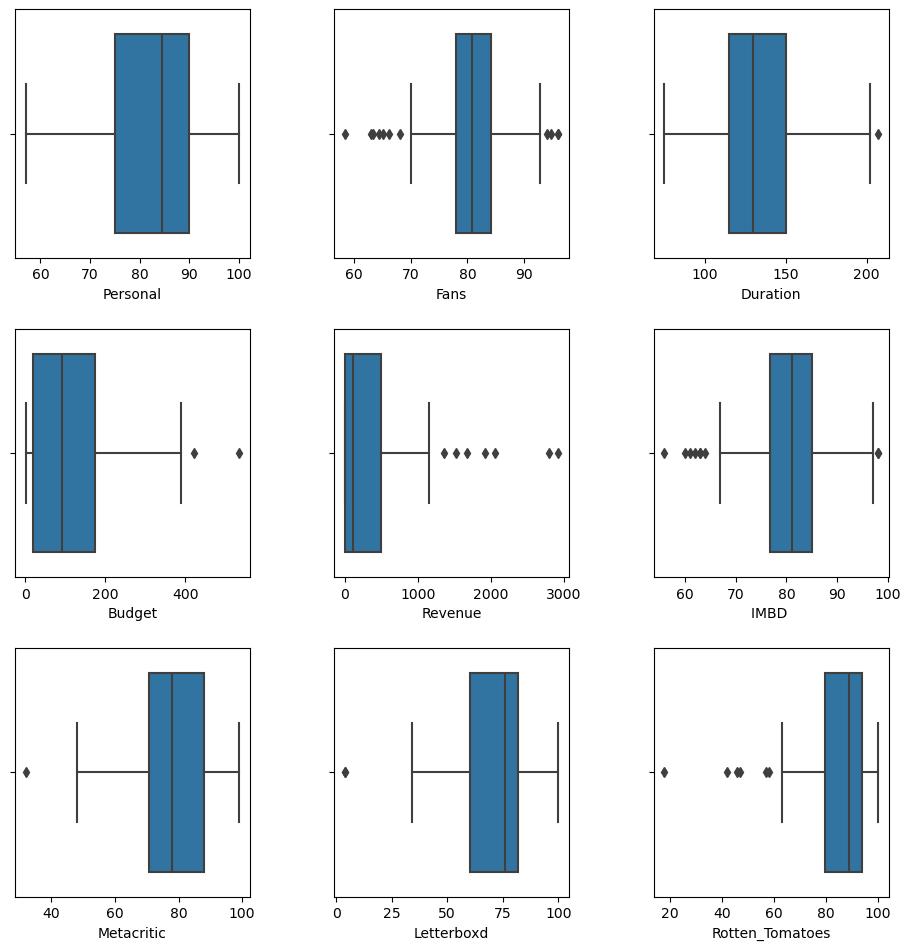

In [24]:
movies['Letterboxd']=movies['Letterboxd'].str.replace('.', '')
movies['Letterboxd']=movies['Letterboxd'].str.replace(',', '')
movies['Letterboxd']=movies['Letterboxd'].astype(float)
movies['IMBD ']=movies['IMBD '].str.replace('.', '')
movies['IMBD ']=movies['IMBD '].str.replace(',', '')
movies['IMBD ']=movies['IMBD '].astype(float)
fig, axes = plt.subplots(3, 3,figsize=(10,10))
fig.tight_layout(pad=3)
sns.boxplot(x=movies['Personal'], ax=axes[0,0]);
sns.boxplot(x=movies['Fans'], ax=axes[0,1]);
sns.boxplot(x=movies['Duration'], ax=axes[0,2]);
sns.boxplot(x=movies['Budget'], ax=axes[1,0]);
sns.boxplot(x=movies['Revenue'], ax=axes[1,1]);
sns.boxplot(x=movies['IMBD '], ax=axes[1,2]);
sns.boxplot(x=movies['Metacritic'], ax=axes[2,0]);
sns.boxplot(x=movies['Letterboxd'], ax=axes[2,1]);
sns.boxplot(x=movies['Rotten_Tomatoes'], ax=axes[2,2]);
#this code snippet cleans certain columns ('Letterboxd' and 'IMBD') by removing punctuation characters and converts them to floating-point numbers. Then, it visualizes the distribution of values in various columns using box plots arranged in a grid. Box plots provide insights into the distribution, central tendency, and variability of the data, helping to identify outliers and assess the overall spread of the data.

In [25]:
movies_numeric = movies.select_dtypes(include='number')
#After executing this code, movies_numeric will contain only the columns from the original movies DataFrame that have numeric data types.

In [26]:
Q1 = movies_numeric.quantile(0.25)
Q3 = movies_numeric.quantile(0.75)
IQR = Q3 - Q1
Q1
#After executing this code, the variable Q1 will contain the first quartile values for each numeric column in the DataFrame movies_numeric.

Duration           115.000000
Budget              19.875310
Revenue              1.505659
IMBD                76.750000
Rotten_Tomatoes     79.750000
Metacritic          70.750000
Letterboxd          60.000000
Personal            75.000000
Fans                78.050000
Name: 0.25, dtype: float64

In [27]:
#We calculate the outliers only once (changed in class)
movies_outliers = ((movies_numeric < (Q1 - 1.5 * IQR)) | (movies_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

# We get those index from the outliers
outliers_index = list(movies_outliers[movies_outliers].index)
#We locate them 
outliers = movies.loc[outliers_index]

outliers


Year      Genre  Duration      Budget  \
Title                                                                     
The dark knight                   2008     Action       152  534.858444   
One flew over the cuckoos nest    1975      Drama       133  112.000000   
Shichinin no samurai              1954     Action       207    0.269061   
The prestige                      2006      Drama       130   53.089891   
The lion king                     1994  Animation        88  422.783777   
Spiderman no way home             2021     Action       148  200.000000   
Avengers infinity war             2018     Action       149  321.000000   
Avengers endgame                  2019     Action       181  356.000000   
Transformers age of exctintion    2014     Action       165  210.000000   
Godzila vs kong                   2021     Action       113  200.000000   
Godzilla                          2014     Action       123  160.000000   
Godzilla king of the monster      2019     Sci-fi       132  170.000000   
Thor love and thunder             2022     Action       118  250.000000   
Black panter                      2018     Action       134  200.000000   
Antman and the wasp quantumania   2023     Action       124  200.000000   
Eternals                          2021     Action       156  200.000000   
Transformers                      2007     Action       144  150.000000   
Jurassic world                    2015     Action       124  150.000000   
Singing in the rain               1952     Comedy       103    2.540800   
Alien                             1979     Horror       117   11.000000   
Aliens                            1986     Action       137   18.500000   
The social network                2010  Biography       120   40.000000   
Finding nemo                      2003  Animation       100   94.000000   
Iron man                          2008     Action       126  140.000000   
Rebecca                           1940      Drama       130    1.288000   
The avengers                      2012     Action       143  220.000000   
Monty python and the holy grail   1975  Adventure        91    0.289849   
127 hours                         2010  Biography        94  180.000000   
Taken                             2008     Action        93   25.000000   
American gangster                 2007  Biography       157  100.000000   
The deer hunter                   1978      Drama       183   15.000000   
Avatar                            2009     Action       162  237.000000   

                                      Revenue  IMBD   Rotten_Tomatoes  \
Title                                                                   
The dark knight                      2.303232   90.0               95   
One flew over the cuckoos nest       0.918088   98.0               86   
Shichinin no samurai                 0.315744   95.0               89   
The prestige                         1.190259   98.0               92   
The lion king                        0.942045   97.0               72   
Spiderman no way home             1921.847111   82.0               93   
Avengers infinity war             2052.415039   84.0               85   
Avengers endgame                  2799.439100   84.0               94   
Transformers age of exctintion    1104.054072   56.0               18   
Godzila vs kong                    470.116094   63.0               76   
Godzilla                           524.976069   64.0               76   
Godzilla king of the monster       387.300138   60.0               42   
Thor love and thunder              760.928081   62.0               63   
Black panter                      1349.926083   73.0               96   
Antman and the wasp quantumania    476.071180   61.0               46   
Eternals                           402.064899   63.0               47   
Transformers                       709.709780   70.0               57   
Jurassic world                    1671.537444   69.0               71   
Singing in the rain    

In [28]:
#Remove the outliers 
movies.drop(movies.loc[movies_outliers].index,inplace=True)
movies.shape

(116, 11)

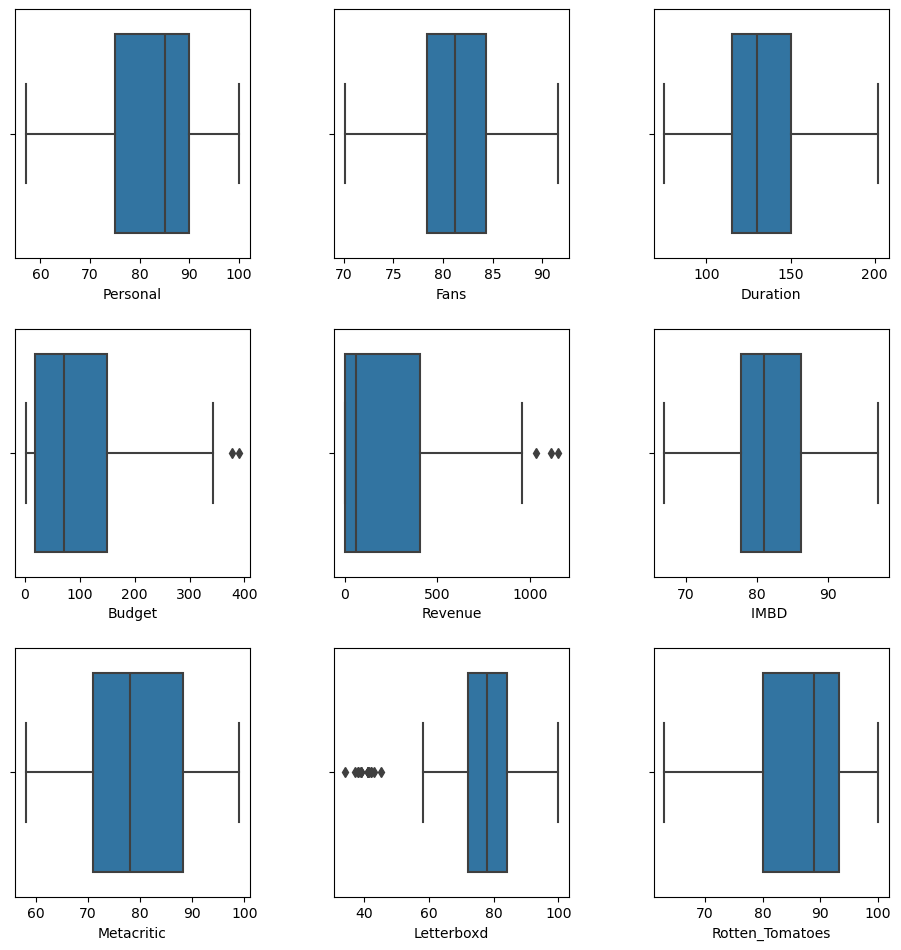

In [29]:
fig, axes = plt.subplots(3, 3,figsize=(10,10))
fig.tight_layout(pad=3)
sns.boxplot(x=movies['Personal'], ax=axes[0,0]);
sns.boxplot(x=movies['Fans'], ax=axes[0,1]);
sns.boxplot(x=movies['Duration'], ax=axes[0,2]);
sns.boxplot(x=movies['Budget'], ax=axes[1,0]);
sns.boxplot(x=movies['Revenue'], ax=axes[1,1]);
sns.boxplot(x=movies['IMBD '], ax=axes[1,2]);
sns.boxplot(x=movies['Metacritic'], ax=axes[2,0]);
sns.boxplot(x=movies['Letterboxd'], ax=axes[2,1]);
sns.boxplot(x=movies['Rotten_Tomatoes'], ax=axes[2,2]);

In [30]:
movies.shape

(116, 11)

### Saving clean DataFrame to `csv`file

In [31]:
movies['Year']=movies['Year'].astype(int)
movies.to_csv('movie_DB.csv')

### Histograms and distributions

c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

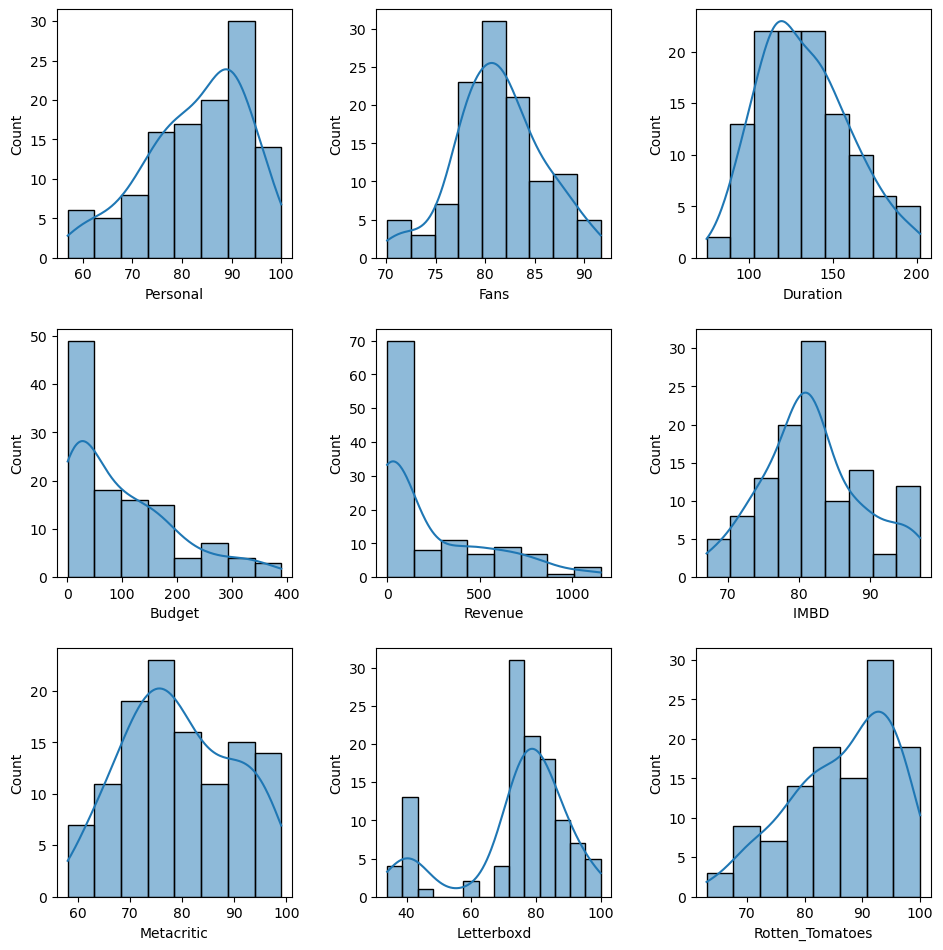

In [32]:
fig, axes = plt.subplots(3, 3,figsize=(10,10))
fig.tight_layout(pad=3)
sns.histplot(x=movies['Personal'], kde=True, ax=axes[0,0]);
sns.histplot(x=movies['Fans'], kde=True, ax=axes[0,1]);
sns.histplot(x=movies['Duration'], kde=True, ax=axes[0,2]);
sns.histplot(x=movies['Budget'], kde=True, ax=axes[1,0]);
sns.histplot(x=movies['Revenue'], kde=True, ax=axes[1,1]);
sns.histplot(x=movies['IMBD '], kde=True, ax=axes[1,2]);
sns.histplot(x=movies['Metacritic'], kde=True, ax=axes[2,0]);
sns.histplot(x=movies['Letterboxd'], kde=True, ax=axes[2,1]);
sns.histplot(x=movies['Rotten_Tomatoes'], kde=True, ax=axes[2,2]);
#In summary, this code creates a 3x3 grid of histograms with KDEs for various columns in the movies DataFrame, providing a visual representation of the distribution of values in each column.


### Distribution by `Year` and `Genre`

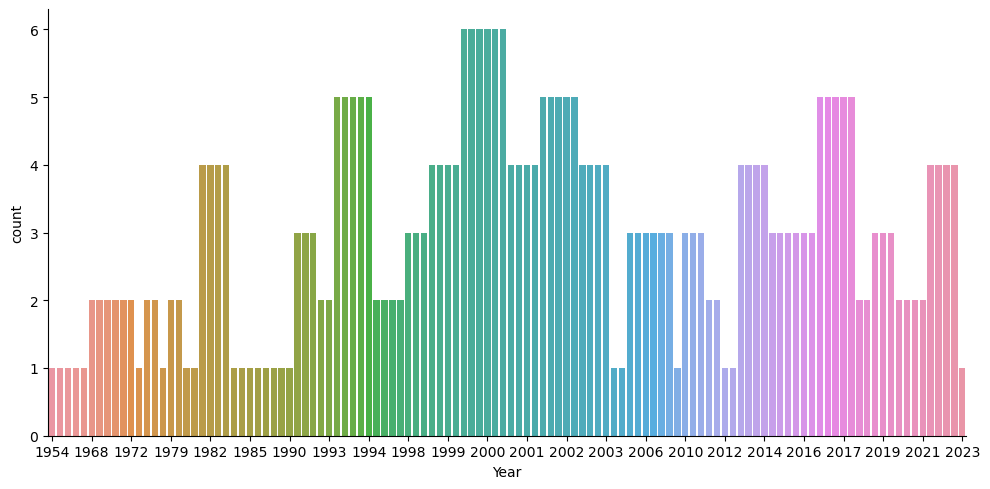

In [33]:
by_year = sns.catplot(x="Year", data=movies, aspect=2, kind="count",order=movies.Year.sort_values())
by_year.set_xticklabels(step=5);
#It creates a count plot that shows the number of movies released each year, with the x-axis representing the years and the y-axis representing the count of movies.
#The aspect ratio of the plot is adjusted to make it wider.
#The years on the x-axis are sorted in ascending order.
#The x-axis tick labels are set to display every 5 years for better readability.
#this code generates a visually appealing count plot that displays the distribution of movie releases over the years, with the x-axis labels set at 5-year intervals for clarity.

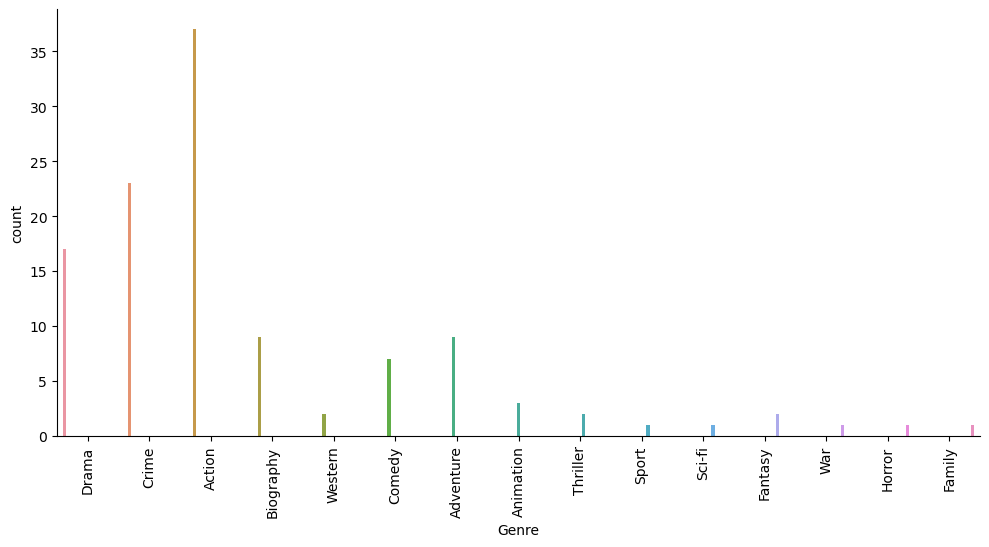

In [34]:
by_genre = sns.catplot(x="Genre", data=movies, aspect=2, kind="count",hue='Genre')
by_genre.set_xticklabels(rotation='vertical');

### Correlations

c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

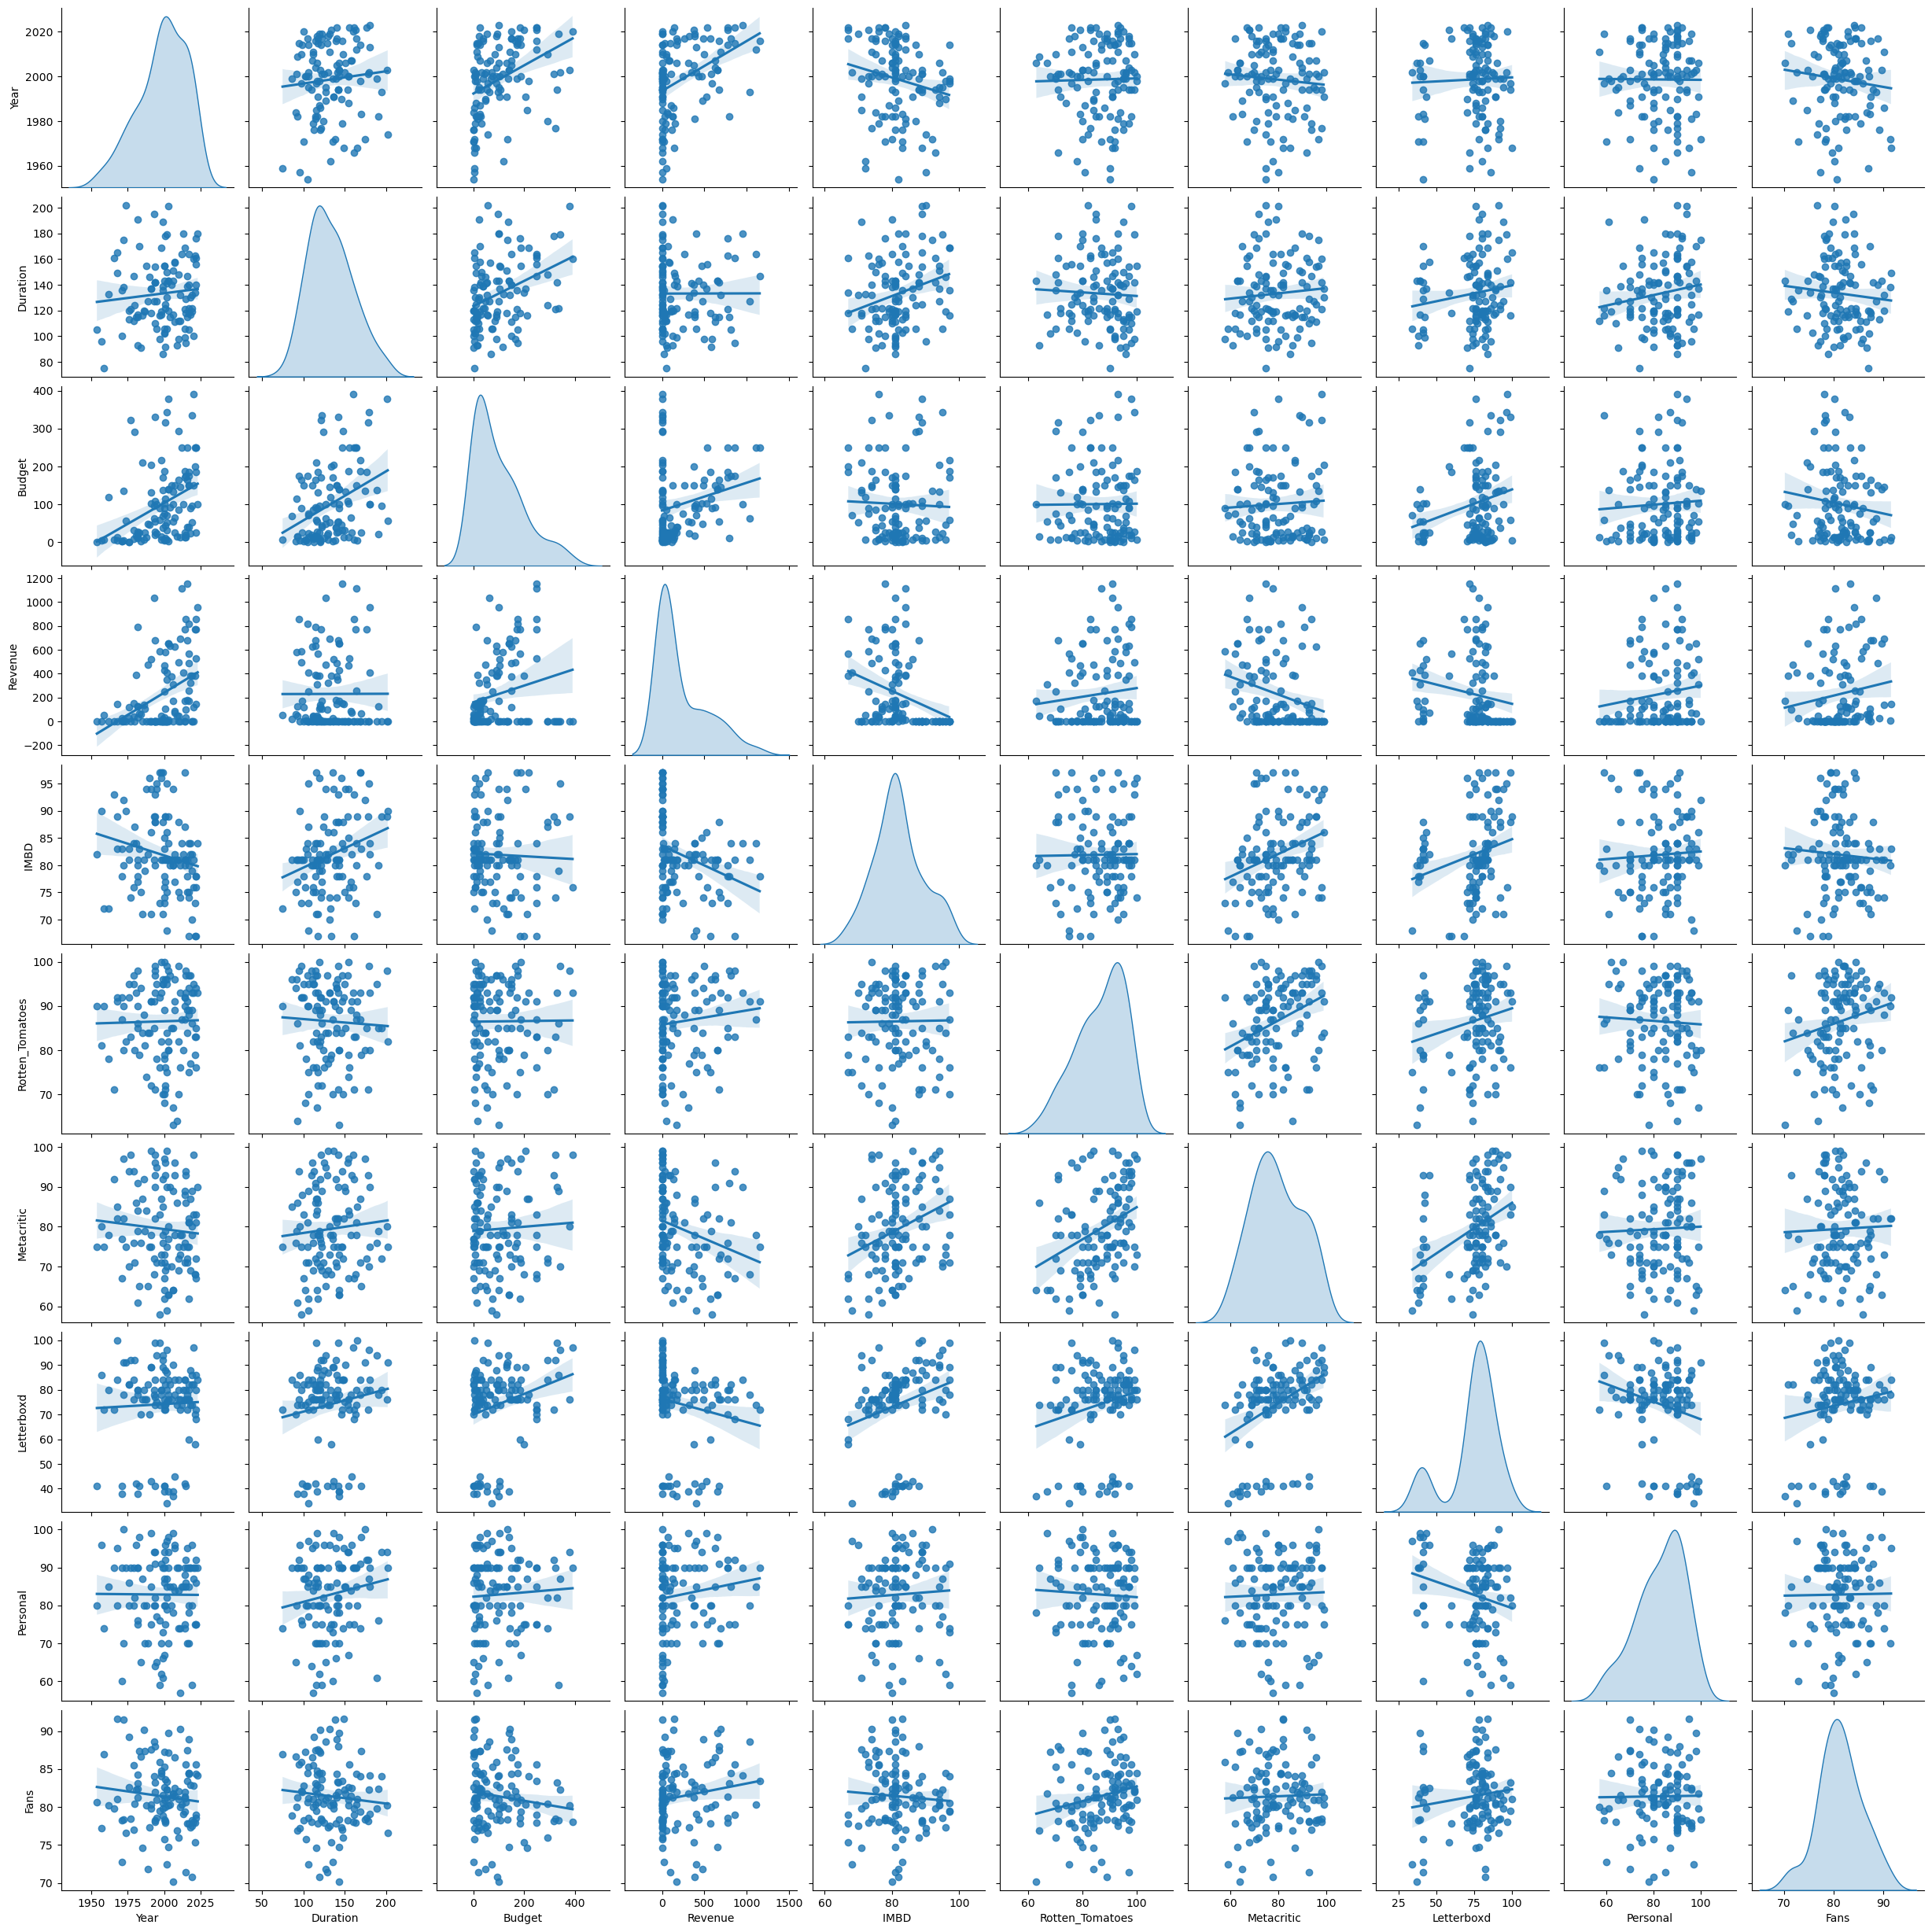

In [35]:
sns.pairplot(movies, height=2.5, kind = 'reg', diag_kind='kde');
#movies: Specifies the DataFrame to use for the pair plot.
#height=2.5: Sets the height of each plot in the grid to 2.5 inches.
#kind='reg': Specifies that a regression line should be added to each scatter plot. This adds a linear regression line to the scatter plots, helping to visualize the relationship between variables.
#diag_kind='kde': Specifies that the diagonal plots should be KDE plots. KDE plots show the distribution of each variable along the diagonal of the grid.
#this code generates a comprehensive pair plot for the numeric columns in the movies DataFrame, with scatter plots and regression lines for pairs of variables and KDE plots for individual variables on the diagonal. This visualization helps in understanding relationships between variables and the distribution of each variable.

c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

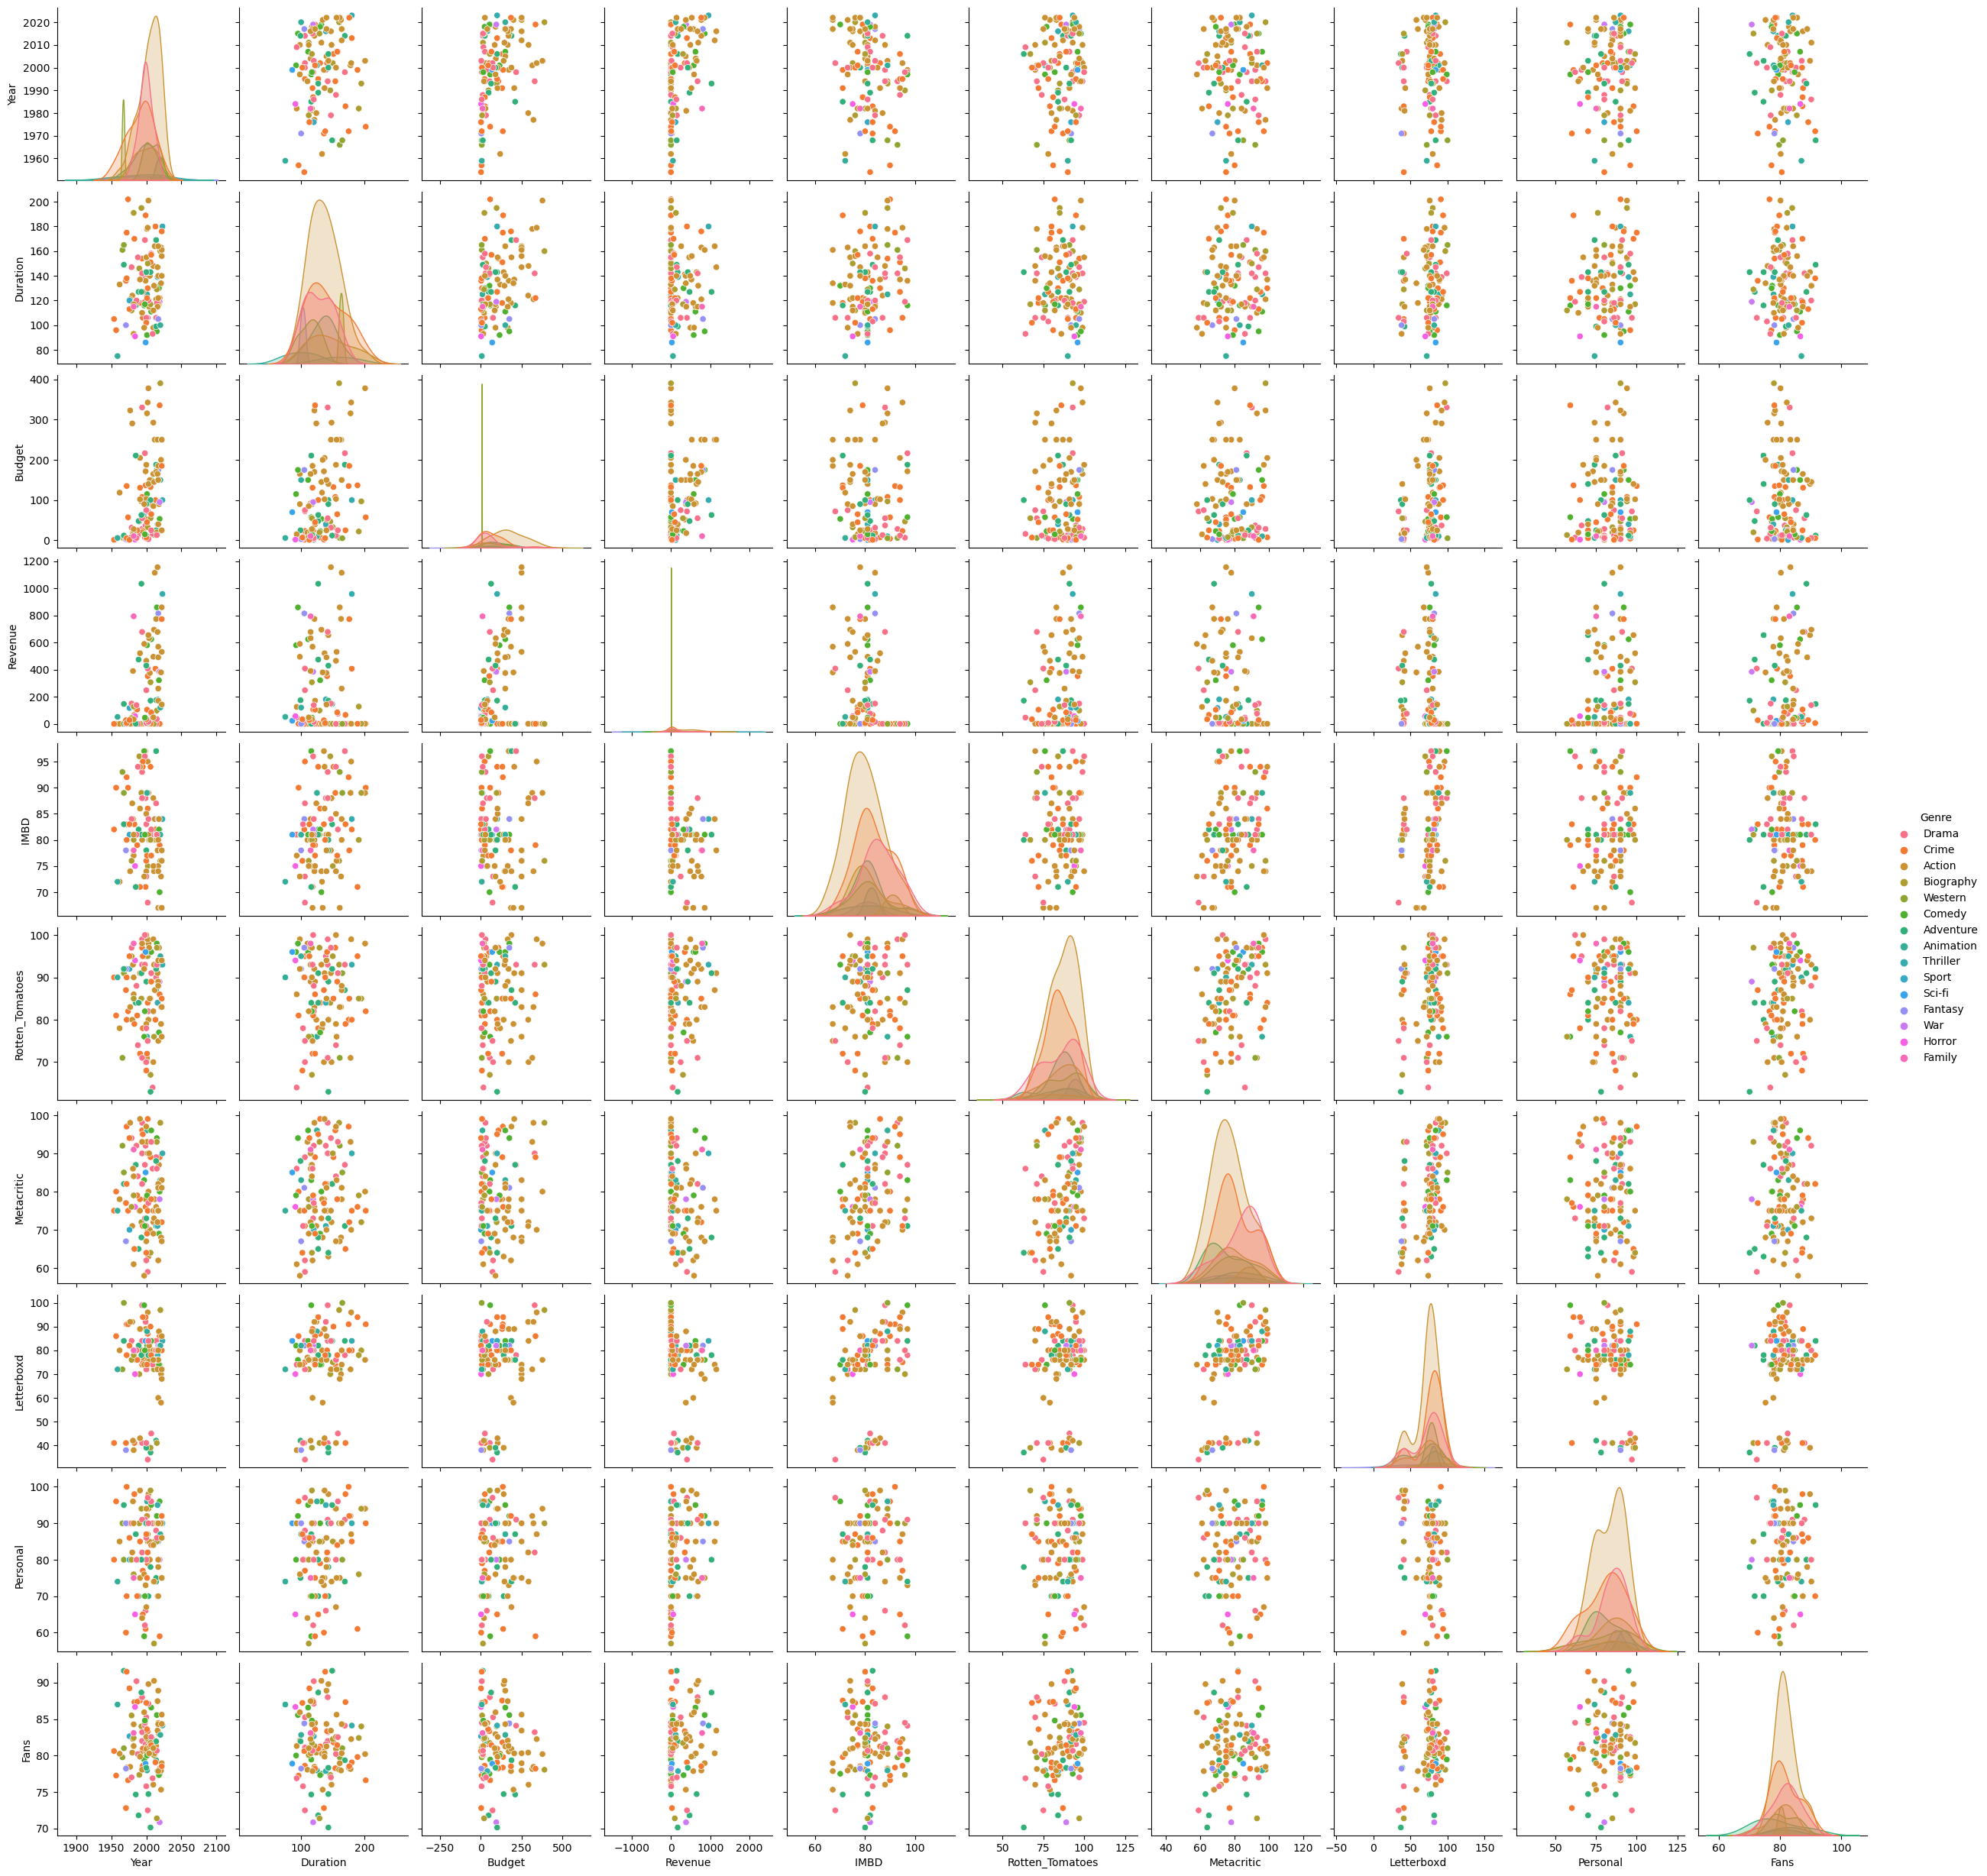

In [36]:
sns.pairplot(movies, height=2.5, hue='Genre');

c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

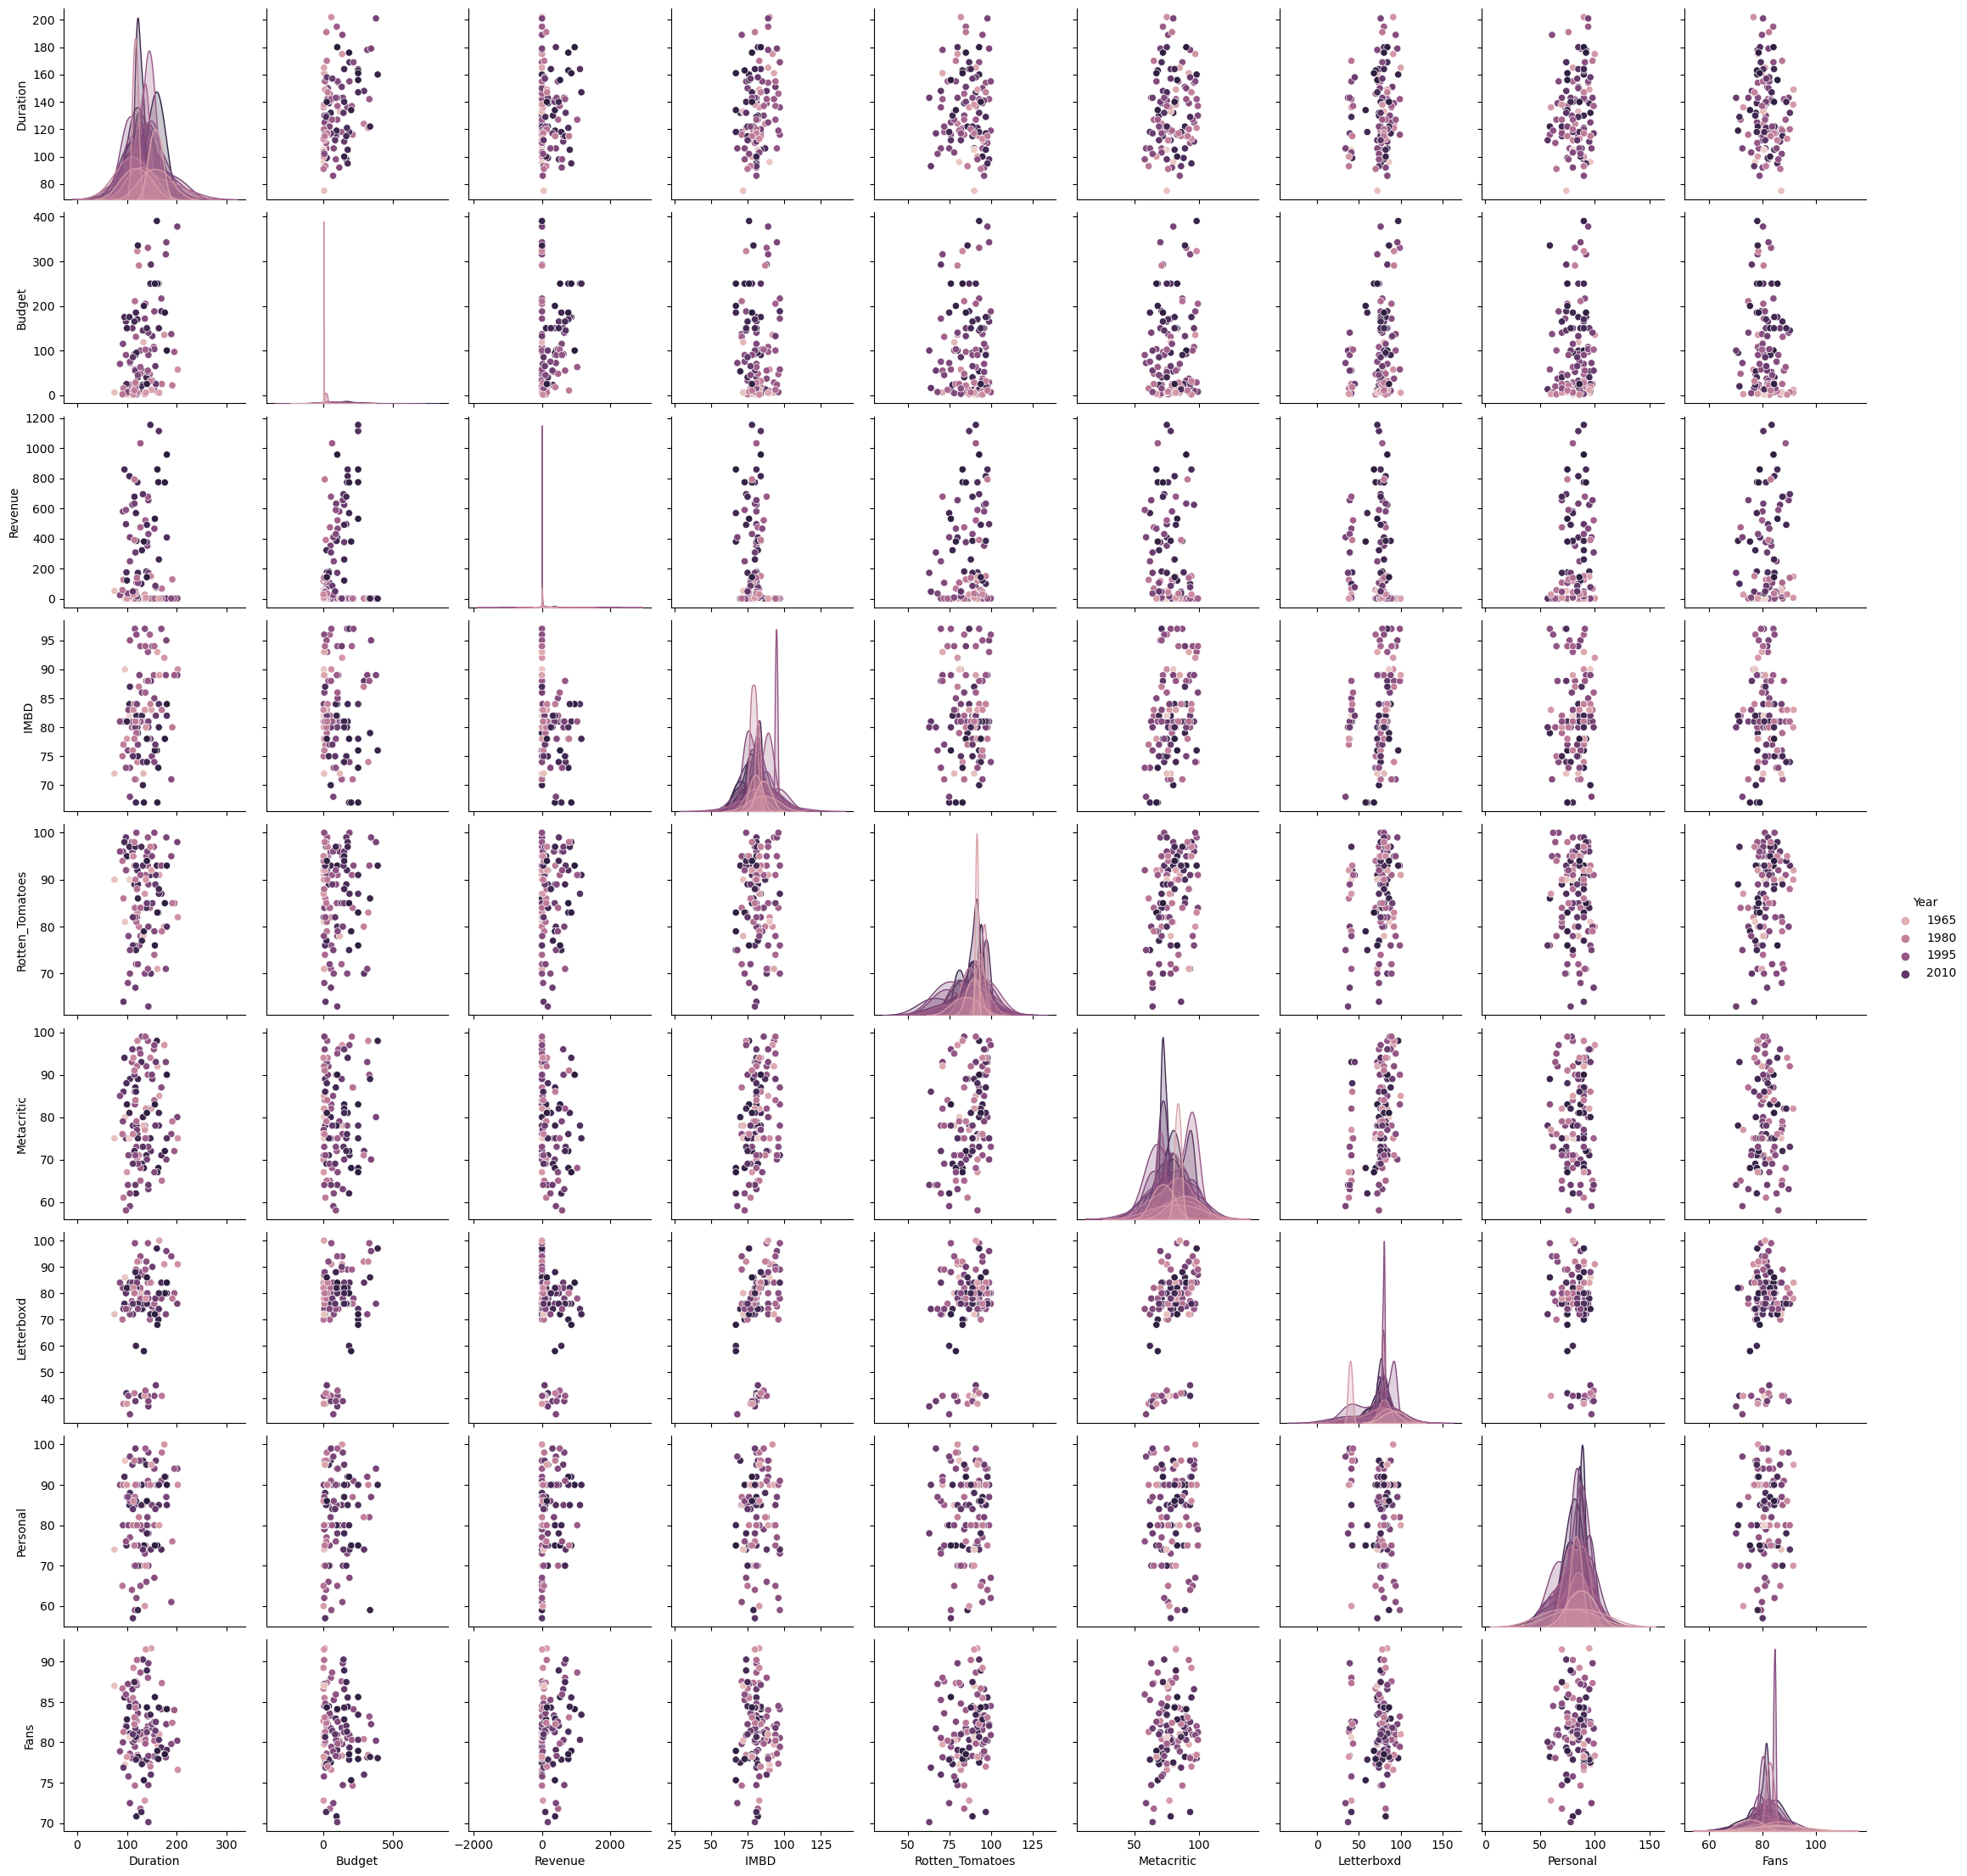

In [37]:
sns.pairplot(movies, height=2.5, hue='Year');

In [38]:
movies.corr(numeric_only=True)

Year  Duration    Budget   Revenue     IMBD   \
Year             1.000000  0.089585  0.374391  0.407548 -0.198897   
Duration         0.089585  1.000000  0.357445  0.001632  0.267115   
Budget           0.374391  0.357445  1.000000  0.226216 -0.036421   
Revenue          0.407548  0.001632  0.226216  1.000000 -0.304148   
IMBD            -0.198897  0.267115 -0.036421 -0.304148  1.000000   
Rotten_Tomatoes  0.018987 -0.046812  0.007580  0.107949  0.011657   
Metacritic      -0.074825  0.079771  0.050008 -0.260043  0.304756   
Letterboxd       0.035310  0.149750  0.250856 -0.173831  0.252023   
Personal        -0.006138  0.154310  0.054847  0.136955  0.049962   
Fans            -0.102908 -0.086938 -0.129241  0.149448 -0.066110   

                 Rotten_Tomatoes  Metacritic  Letterboxd  Personal      Fans  
Year                    0.018987   -0.074825    0.035310 -0.006138 -0.102908  
Duration               -0.046812    0.079771    0.149750  0.154310 -0.086938  
Budget                  0.007580    0.050008    0.250856  0.054847 -0.129241  
Revenue                 0.107949   -0.260043   -0.173831  0.136955  0.149448  
IMBD                    0.011657    0.304756    0.252023  0.049962 -0.066110  
Rotten_Tomatoes         1.000000    0.345407    0.208263 -0.045324  0.197175  
Metacritic              0.345407    1.000000    0.394190  0.031626  0.030915  
Letterboxd              0.208263    0.394190    1.000000 -0.221895  0.132864  
Personal               -0.045324    0.031626   -0.221895  1.000000  0.011153  
Fans                    0.197175    0.030915    0.132864  0.011153  1.000000

In [39]:
print(movies.dtypes)

Year                 int32
Genre               object
Duration             int64
Budget             float64
Revenue            float64
IMBD               float64
Rotten_Tomatoes      int64
Metacritic         float64
Letterboxd         float64
Personal           float64
Fans               float64
dtype: object


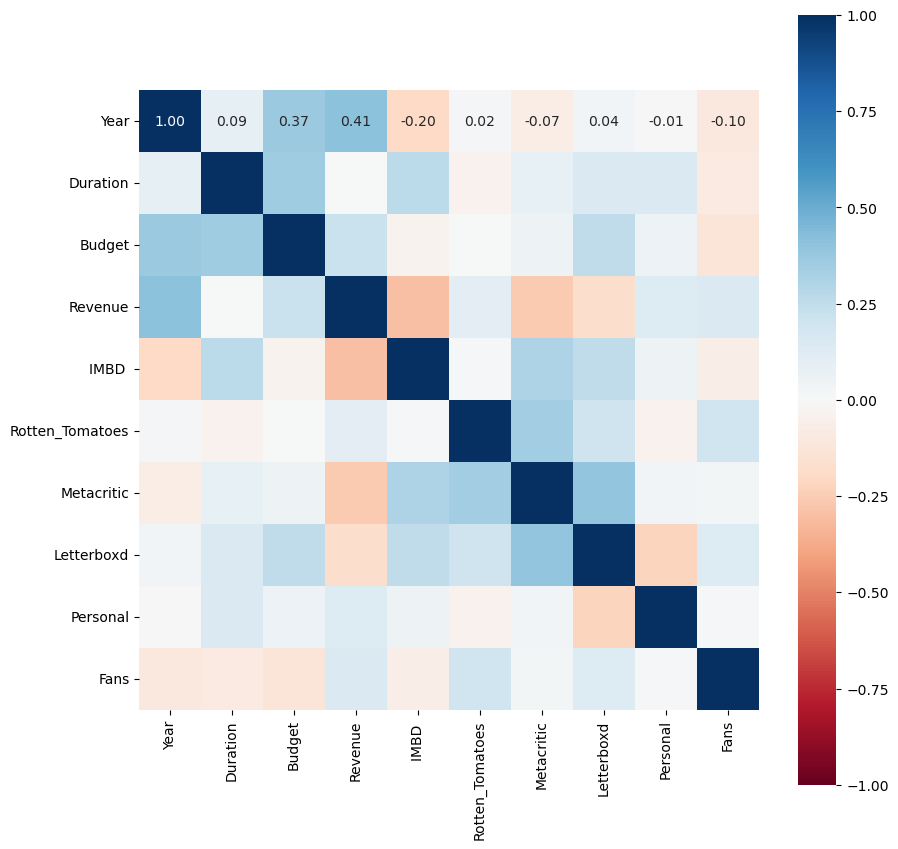

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(movies.corr(numeric_only=True),annot=True,square=True, cmap='RdBu', vmax=1, vmin=-1,fmt=".2f");
#In summary, this code generates a heatmap to visualize the correlation matrix of the numeric columns in the movies DataFrame, providing insights into the relationships between different variables. The annotations and color coding make it easy to interpret the strength and direction of these relationships.
#movies.corr(numeric_only=True): This calculates the correlation matrix for the numeric columns of the movies DataFrame. The numeric_only=True argument ensures that only numeric columns are considered.
#annot=True: This adds annotations (the correlation values) to each cell in the heatmap.
#square=True: This makes each cell in the heatmap square-shaped.
#cmap='RdBu': This sets the colormap to 'RdBu' (Red-Blue), where high positive correlations are shown in red and high negative correlations are shown in blue.
#vmax=1 and vmin=-1: These set the range of the colormap to be from -1 to 1, which is the range of possible correlation values.
#fmt=".2f": This formats the annotation text to display the correlation values with two decimal places.